<a href="https://colab.research.google.com/github/shevochkkaaa/lab-robota/blob/main/%D0%94%D0%BE%D0%B1%D1%80%D0%BE_%D0%BF%D0%BE%D0%B6%D0%B0%D0%BB%D0%BE%D0%B2%D0%B0%D1%82%D1%8C_%D0%B2_Colaboratory!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛБ №7, Шевченко Валерія

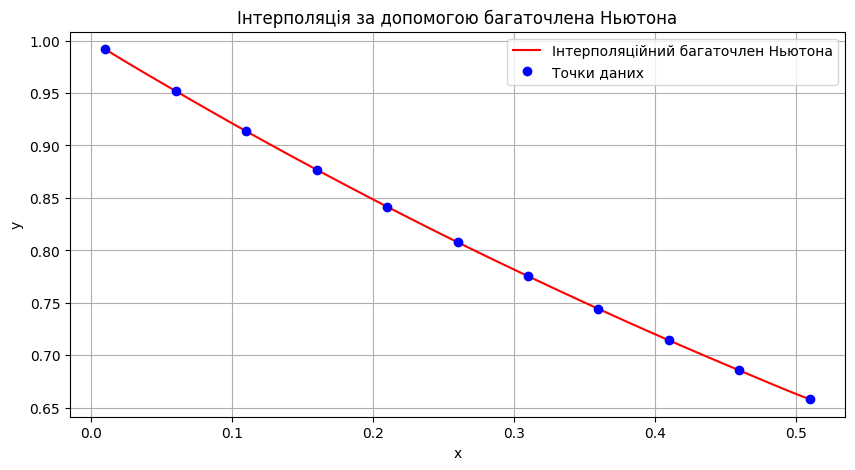

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Визначаємо дані з таблиці
x_data = np.array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51])
y_data = np.array([0.9918, 0.9519, 0.9136, 0.8769, 0.8416, 0.8077, 0.7753, 0.7441, 0.7141, 0.6854, 0.6579])

# Функція для обчислення таблиці розділених різниць
def divided_differences(x, y):
   n = len(y)
   coef = np.zeros([n, n])
   coef[:,0] = y

   for j in range(1, n):
       for i in range(n-j):
           coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

   return coef[0, :]  # повертаємо перший рядок з коефіцієнтами

# Обчислюємо коефіцієнти для багаточлена
coefficients = divided_differences(x_data, y_data)

# Функція для обчислення значення багаточлена Ньютона у точці x
def newton_polynomial(x, x_data, coefficients):
   n = len(coefficients) - 1
   p = coefficients[n]
   for k in range(1, n+1):
       p = coefficients[n-k] + (x - x_data[n-k]) * p
   return p

# Генеруємо значення для побудови графіка
x_values = np.linspace(min(x_data), max(x_data), 100)
y_values = [newton_polynomial(x, x_data, coefficients) for x in x_values]

# Будуємо графік
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, 'r-', label='Інтерполяційний багаточлен Ньютона')
plt.plot(x_data, y_data, 'bo', label='Точки даних')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція за допомогою багаточлена Ньютона')
plt.legend()
plt.grid(True)
plt.show()